# 基于豆瓣图书短评的价值观念变迁研究

## 爬虫

In [ ]:
import os
# 打印当前工作目录
# print(os.getcwd())
# 转换工作目录
# os.chdir("工作目录")

In [119]:
# 生成2019-2023年年度图书榜单url，储存在一个列表
annual_book_url = [f'https://book.douban.com/annual/{i}/' for i in range(2019,2023 + 1)]
print("2019-2023年年度图书榜单url:")
print(annual_book_url)

2019-2023年年度图书榜单url:
['https://book.douban.com/annual/2019/', 'https://book.douban.com/annual/2020/', 'https://book.douban.com/annual/2021/', 'https://book.douban.com/annual/2022/', 'https://book.douban.com/annual/2023/']


In [120]:
# 生成2019-2023年度图书url
nineteen_number = ['34434309','33440205','33459737','33424487','30473909','33445034','34808267','34617780','30475767','34782362']
nineteen_annual_book_url = [f'https://book.douban.com/subject/{number}/' for number in nineteen_number]
# print("2019年度图书url：")
# print(nineteen_annual_book_url)
twenty_number = ['35092383','35005045','34942789','30441551','34988734','34933701','35025453','35005062','35132631','35023731']
twenty_annual_book_url = [f'https://book.douban.com/subject/{number}/' for number in twenty_number]
# print("2020年度图书url：")
# print(twenty_annual_book_url)
twentyone_number = ['35315153','35390390','35523099','35546622','35481512','35313227','35230281','35335514','35459915','35094680']
twentyone_annual_book_url = [f'https://book.douban.com/subject/{number}/' for number in twentyone_number]
# print("2021年度图书url：")
# print(twentyone_annual_book_url)
twentytwo_number = ['35966120','35819419','35776315','35875393','35695541','35942057','35817787','35883125','35909188','36073906']
twentytwo_annual_book_url = [f'https://book.douban.com/subject/{number}/' for number in twentytwo_number]
# print("2022年度图书url：")
# print(twentytwo_annual_book_url)
twentythree_number = ['36150423','36457094','36162256','35947066','36361860','36127030','36374149','36248699','36321036','36206462']
twentythree_annual_book_url = [f'https://book.douban.com/subject/{number}/' for number in twentythree_number]
# print("2023年度图书url：")
# print(twentythree_annual_book_url)
total_number = nineteen_number + twenty_number + twentyone_number + twentytwo_number + twentythree_number
total_annual_book_url = nineteen_annual_book_url + twenty_annual_book_url + twentyone_annual_book_url + twentytwo_annual_book_url + twentythree_annual_book_url
print("2019-2023年度图书url：")
print(total_annual_book_url)

2019-2023年度图书url：
['https://book.douban.com/subject/34434309/', 'https://book.douban.com/subject/33440205/', 'https://book.douban.com/subject/33459737/', 'https://book.douban.com/subject/33424487/', 'https://book.douban.com/subject/30473909/', 'https://book.douban.com/subject/33445034/', 'https://book.douban.com/subject/34808267/', 'https://book.douban.com/subject/34617780/', 'https://book.douban.com/subject/30475767/', 'https://book.douban.com/subject/34782362/', 'https://book.douban.com/subject/35092383/', 'https://book.douban.com/subject/35005045/', 'https://book.douban.com/subject/34942789/', 'https://book.douban.com/subject/30441551/', 'https://book.douban.com/subject/34988734/', 'https://book.douban.com/subject/34933701/', 'https://book.douban.com/subject/35025453/', 'https://book.douban.com/subject/35005062/', 'https://book.douban.com/subject/35132631/', 'https://book.douban.com/subject/35023731/', 'https://book.douban.com/subject/35315153/', 'https://book.douban.com/subject/353

In [122]:
import requests
from lxml import etree
# 获取100条热门短评的函数
def get_book_comments(url, page_num):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'
                      ' Chrome/109.0.0.0 Safari/537.36 SLBrowser/9.0.3.5211 SLBChan/105'}
    comments = []
    for i in range(page_num):
        response = requests.get(url + 'comments?start=' + str(i * 20), headers=headers)
        html = etree.HTML(response.text)
        comment_list = html.xpath('//div[@class="comment"]')
        for comment in comment_list:
            content = comment.xpath('.//span[@class="short"]/text()')[0]
            comments.append(content)
    return comments
# 获取书名、作者、评分、评分人数、内容简介、100条热门短评的函数
def get_book_info(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'
                      ' Chrome/109.0.0.0 Safari/537.36 SLBrowser/9.0.3.5211 SLBChan/105'}
    response = requests.get(url, headers=headers)
    html = etree.HTML(response.text)

    # 获取书名、作者、评分、评分人数、内容简介、100条热门短评
    title = html.xpath('//*[@id="wrapper"]/h1/span/text()')[0]
    author = html.xpath('//*[@id="info"]/span[1]/a/text()')[0]
    author_introduction_list = html.xpath('//*[@id="content"]/div/div[1]/div[3]/div[3]/span[2]/div/p/text()')
    author_introduction = "\n".join(author_introduction_list)
    rating = html.xpath('//*[@id="interest_sectl"]/div/div[2]/strong/text()')[0].strip()
    rating_count = html.xpath('//*[@id="interest_sectl"]/div/div[2]/div/div[2]/span/a/span/text()')[0]
    summary_list = html.xpath('//*[@id="link-report"]/span[2]/div/div/p/text()')
    summary = "\n".join(summary_list)
    # 爬取5页短评，每页20条
    short_review_list = get_book_comments(url, 5)
    # short_review = "\n".join(short_review_list)

    return {
        'title': title,
        'author': author,
        'author_introduction':author_introduction,
        'rating': rating,
        'rating_count': rating_count,
        'summary': summary,
        # 短评分为五个部分，避免过长
        'short_review1': "\n".join(short_review_list[0:20]),
        'short_review2': "\n".join(short_review_list[20:40]),
        'short_review3': "\n".join(short_review_list[40:60]),
        'short_review4': "\n".join(short_review_list[60:80]),
        'short_review5': "\n".join(short_review_list[80:100])
    }
if __name__ == '__main__':
    annual_book_data = []
    count = 0
    # 收集图书信息，遇到问题跳过，继续执行下次循环
    for url in total_annual_book_url:
        count += 1
        try:
            book_info = get_book_info(url)
            annual_book_data.append(book_info)
            print(f"{count}:{book_info}")
        except Exception as e:
            print(f"{count}:出现错误:{e}")
            continue

1:{'title': '82年生的金智英', 'author': '[韩]赵南柱', 'author_introduction': '1978年出生于漢城，梨花女子大学社会学系毕业。担任《PD手册》《不满ZERO》《Live今日早晨》等时事类节目编剧十餘年，对社会现象及问题十分敏锐，见解透彻，擅长以写实又能引起广泛共鸣的故事手法，呈现庶民日常中的真实悲剧。\n2011年以长篇小说《倾听》获得“文学村小说奖”；2016年以长篇小说《为了高马那智》获得“黄山伐青年文学奖”；2017年以《82年生的金智英》获“年度作家奖”。\n本书是在2014年底发生的“妈虫”事件后，作者感到社会对女性、特别是身为母亲的女性的苛责，深受触动之下动笔写成。“妈虫”是结合英文“mom”和“虫”的韩文新造单字，用于贬低无法管教在公共场合大声喧闹幼童的年轻母亲。这个新兴名词虽然用于指称部分管教无方的妈妈，但不分青红皂白使用在大部分母亲身上，造成了普遍的恐惧和伤痛。\n她说：\n因为身为女性而受到各种限制与差别待遇，\n导致没有办法获得与付出相匹配的成就，\n甚至认为那是因为自己无能而深感自责的女性，\n希望她们在阅读本书之后，可以获得一丝安慰。', 'rating': '8.1', 'rating_count': '90714', 'summary': '一个女孩要经历多少看不见的坎坷，才能跌跌撞撞地长大成人。\n亚洲10年来罕见的现象级畅销书，凭口口相传在韩国销量突破100万册。\n韩国书店联合会评选2017年最佳小说，作者赵南柱被授予“年度作家”殊荣。\n韩国总统文在寅、国民主持人刘在石、“少女时代”崔秀英、BTS团长金南 俊都 在阅读， 但阅读这本书的女艺人会被人身攻击。\n《熔炉》《釜山行》原班主演孔侑、郑有美出演同名电影即将上映。\n内容简介：\n金智英，1982年4月1日出生于首尔某医院妇产科。成长于公务员家庭，一家六口人住在三十三平的房子里。\n她就是那种你每天都会迎面遇到的普通女孩。\n从小，金智英就有很多困惑。\n家里最好的东西总是优先给弟弟，她和姐姐只能享有剩下的食物，共用一间房、一床被子。上小学时，被邻座男孩欺负，她哭着向老师倾诉，老师却笑着说：“男孩子都是这样的，愈是喜欢的女生就愈会欺负她。”上了中学，常要提地铁、公交车上的咸猪手。在学校也不能掉以轻心，也有男老师喜欢对

In [124]:
# 仅提取标题（测试）
if __name__ == '__main__':
    annual_book_tittle_data = []
    count = 0
    for url in total_annual_book_url:
        count += 1
        try:
            book_info = get_book_info(url)
            book_info_title = book_info.get('title')
            annual_book_tittle_data.append(book_info_title)
            print(f"{count}:{book_info_title}")
        except Exception as e:
            print(f"{count}:出现错误:{e}")
            continue
    print(annual_book_tittle_data)
    print(f"共提取{len(annual_book_tittle_data)}本书")

1:82年生的金智英
2:你当像鸟飞往你的山
3:书店日记
4:时间的秩序
5:OPUS 作品
6:出现错误:list index out of range
7:萨拉戈萨手稿
8:出现错误:list index out of range
9:人生海海
10:佛兰德镜子
11:出现错误:list index out of range
12:夜晚的潜水艇
13:回归故里
14:烧纸
15:走出唯一真理观
16:出现错误:list index out of range
17:失落的卫星
18:银河系边缘的小失常
19:文化失忆
20:怪诞故事集
21:克拉拉与太阳
22:字母表谜案
23:从零开始的女性主义
24:置身事内
25:也许你该找个人聊聊
26:刘擎西方现代思想讲义
27:下沉年代
28:文城
29:海边的房间
30:桶川跟踪狂杀人事件
31:始于极限
32:可能性的艺术
33:足利女童连续失踪事件
34:如雪如山
35:我本芬芳
36:看不见的女性
37:必有人重写爱情
38:应得的权利
39:漫长的余生
40:当我们不再理解世界
41:我在北京送快递
42:明亮的夜晚
43:一百年，许多人，许多事
44:同意
45:我还能看到多少次满月升起
46:为了活下去的思想
47:凯列班与女巫
48:赶时间的人
49:多谈谈问题
50:疼痛部
['82年生的金智英', '你当像鸟飞往你的山', '书店日记', '时间的秩序', 'OPUS 作品', '萨拉戈萨手稿', '人生海海', '佛兰德镜子', '夜晚的潜水艇', '回归故里', '烧纸', '走出唯一真理观', '失落的卫星', '银河系边缘的小失常', '文化失忆', '怪诞故事集', '克拉拉与太阳', '字母表谜案', '从零开始的女性主义', '置身事内', '也许你该找个人聊聊', '刘擎西方现代思想讲义', '下沉年代', '文城', '海边的房间', '桶川跟踪狂杀人事件', '始于极限', '可能性的艺术', '足利女童连续失踪事件', '如雪如山', '我本芬芳', '看不见的女性', '必有人重写爱情', '应得的权利', '漫长的余生', '当我们不再理解世界', '我在北京送快递', '明亮的夜晚', '一百年，许多人，许多事', '同意', '我还能看到多少次满月升起', '为了活下

In [137]:
# 保存到csv文件
import pandas as pd
df = pd.DataFrame(annual_book_data)
# 将数据保存到CSV文件中
df.to_csv('book_info.csv', index=False, encoding='utf-8-sig')
print("over!")

over!


## 词频统计及可视化

In [126]:
import pandas as pd
import jieba
from collections import Counter
import csv
# 读取CSV文件
book_info_csv_data = pd.read_csv('book_info.csv')
# 选择需要的列
reviews_columns = book_info_csv_data[['short_review1', 'short_review2', 'short_review3','short_review4','short_review5']]
# print(reviews_columns)
short_reviews_data = ""
for i in reviews_columns:
    for j in reviews_columns[i]:
        short_reviews_data += str(j)
# 使用jieba进行分词
seg_list = jieba.cut(short_reviews_data, cut_all=False)
words = [word for word in seg_list]
# 定义停用词列表
stop_words = []
with open('stop_list.txt','r', encoding = 'utf-8') as f:
    # 读取文件的所有行
    for line in f.readlines():
        # 移除每行末尾的换行符 '\n'，并将处理后的词语追加到 stop_list 列表中
        stop_words.append(line.replace('\n',''))
# 去除停用词,且长度大于1,2,3
filtered_words_len2 = [word for word in words if (word not in stop_words) and (len(word) > 1)]
filtered_words_len3 = [word for word in words if (word not in stop_words) and (len(word) > 2)]
filtered_words_len4 = [word for word in words if (word not in stop_words) and (len(word) > 3)]
# 统计词频(长度大于1，2，3)
word_counts_len2 = Counter(filtered_words_len2)
word_counts_len3 = Counter(filtered_words_len3)
word_counts_len4 = Counter(filtered_words_len4)
print("长度大于1的词频统计：")
print(word_counts_len2)
print("长度大于2的词频统计：")
print(word_counts_len3)
print("长度大于3的词频统计：")
print(word_counts_len4)

长度大于1的词频统计：
Counter({'作者': 1018, '女性': 964, '本书': 915, '故事': 891, '生活': 522, '喜欢': 486, '世界': 486, '社会': 464, '一种': 445, '历史': 369, '小说': 367, '时间': 351, '感觉': 338, '真的': 330, '阅读': 319, '读完': 301, '一本': 294, '文学': 288, '作品': 270, '男性': 263, '文字': 257, '人生': 256, '时代': 250, '理解': 247, '人物': 229, '语言': 226, '现实': 219, '女性主义': 218, '思想': 215, '内容': 209, '读者': 206, '感受': 206, '人类': 201, '自我': 198, '思考': 193, '这本': 192, '经历': 190, '老师': 190, '上野': 189, '真实': 188, '希望': 187, '政治': 185, '写作': 184, '意义': 180, '过程': 175, '地方': 174, '家庭': 168, '书店': 164, '自由': 161, '中国': 161, '这是': 160, '视角': 159, '东西': 158, '选择': 157, '叙事': 155, '方式': 154, '工作': 153, '男人': 150, '关系': 149, '像是': 148, '作家': 148, '之间': 147, '实在': 145, '生命': 145, '一点': 142, '哲学': 140, '那种': 136, '女人': 135, '发现': 135, '美国': 135, '虚构': 134, '弱者': 134, '国家': 133, '一篇': 133, '发生': 131, '只能': 131, '确实': 130, '事件': 130, '文化': 130, '结构': 129, '令人': 129, '想象': 128, '好看': 126, '权利': 122, '性别': 121, '永远': 119, '母亲': 118, '值得': 118, '特别': 11

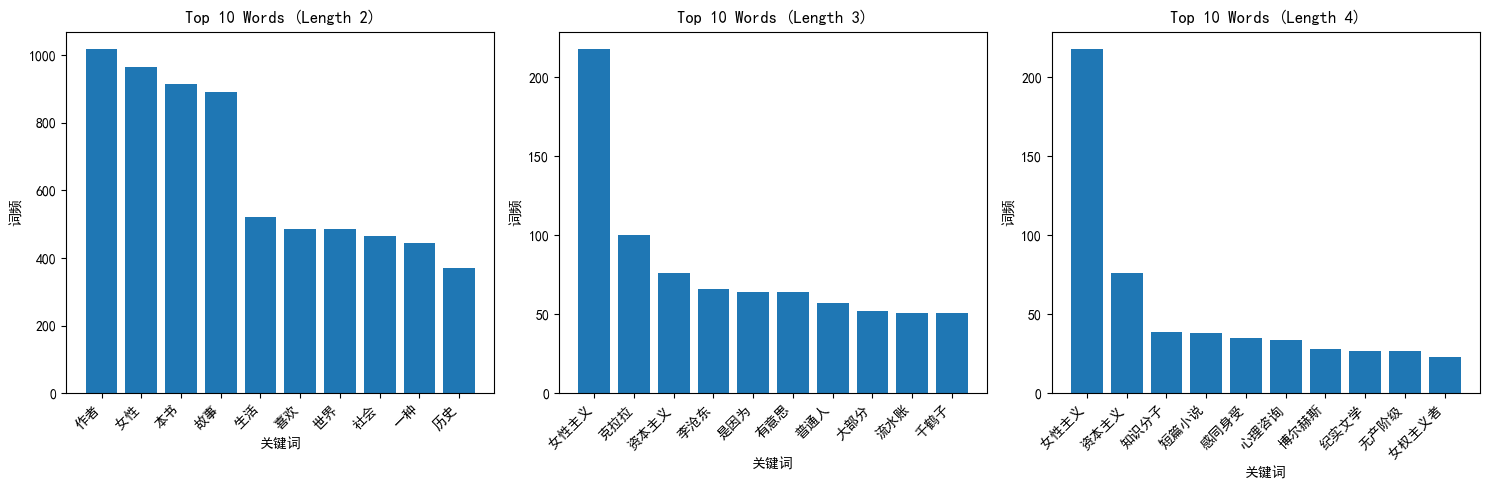

In [127]:
import matplotlib.pyplot as plt
# 找出词频前10
top_words_len2 = word_counts_len2.most_common(10)
top_words_len3 = word_counts_len3.most_common(10)
top_words_len4 = word_counts_len4.most_common(10)

# 准备数据用于绘图
words_len2, freqs_len2 = zip(*top_words_len2)
words_len3, freqs_len3 = zip(*top_words_len3)
words_len4, freqs_len4 = zip(*top_words_len4)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题

# 绘制可视化图表
plt.figure(figsize=(15, 5))

# 第一个子图
plt.subplot(1, 3, 1)
plt.bar(words_len2, freqs_len2)
plt.title('Top 10 Words (Length 2)')
plt.xlabel('关键词')
plt.ylabel('词频')
plt.xticks(rotation=45, ha='right')  # 设置横坐标标签旋转角度为45度，右对齐

# 第二个子图
plt.subplot(1, 3, 2)
plt.bar(words_len3, freqs_len3)
plt.title('Top 10 Words (Length 3)')
plt.xlabel('关键词')
plt.ylabel('词频')
plt.xticks(rotation=45, ha='right')  # 设置横坐标标签旋转角度为45度，右对齐

# 第三个子图
plt.subplot(1, 3, 3)
plt.bar(words_len4, freqs_len4)
plt.title('Top 10 Words (Length 4)')
plt.xlabel('关键词')
plt.ylabel('词频')
plt.xticks(rotation=45, ha='right')  # 设置横坐标标签旋转角度为45度，右对齐

plt.tight_layout()
plt.show()

In [ ]:
# 存入csv文件
with open('word_counts_len2.csv', 'w', newline='', encoding='utf-8-sig') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['词语', '频率'])
    for word, count in word_counts_len2.items():
        writer.writerow([word, count])
with open('word_counts_len3.csv', 'w', newline='', encoding='utf-8-sig') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['词语', '频率'])
    for word, count in word_counts_len3.items():
        writer.writerow([word, count])
with open('word_counts_len4.csv', 'w', newline='', encoding='utf-8-sig') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['词语', '频率'])
    for word, count in word_counts_len4.items():
        writer.writerow([word, count])

## 主题模型分析

### 评论分词

In [128]:
import pandas as pd
import jieba

df = pd.read_csv("book_info.csv")
# print(df.head())
stop_words = []
with open('stop_list.txt','r', encoding = 'utf-8') as f:
    # 读取文件的所有行
    for line in f.readlines():
        # 移除每行末尾的换行符 '\n'，并将处理后的词语追加到 stop_list 列表中
        stop_words.append(line.replace('\n',''))
# print(stop_words)
short_reviews_list = []
for i in range(len(df['title'])):  # 确保 i 是正确的行索引
    short_reviews = ""
    for j in range(1, 6):  # 假设有 short_review1 到 short_review5 这5列
        try:
            # 正确地使用 f-string 来动态生成列名
            short_reviews += str(df[f'short_review{j}'].iloc[i])
        except KeyError as e:
            print(f"Column {e} does not exist in DataFrame.")
    # 将拼接好的字符串添加到列表中
    short_reviews_list.append(short_reviews)
# 将列表（短评和）转换为 DataFrame 的一列
df['short_reviews'] = short_reviews_list
# print(df['short_reviews'])
data_list = []
for i in df['short_reviews']:
    data_list_temporary = [x for x in jieba.cut(str(i)) if x not in stop_words]  # 过滤停用词
    data_list_temporary_str = ' '.join(data_list_temporary)  # 将列表转换为字符串
    data_list.append(data_list_temporary_str)
df['reviews_cut'] = data_list
print(df['reviews_cut'])
# 分别将评论分词结果保存为csv和xlsx文件
df['reviews_cut'].to_csv("book_reviews_cut.csv", index=False,encoding='utf-8-sig')
df['reviews_cut'].to_excel("book_reviews_cut.xlsx")

0     五年 前 早 傲慢无礼 冷酷 没良心 生活 无关 大学 里 金智英 短暂 母亲 拥有 人生 ...
1     急 吐 槽 译名 忍不住 想替 译者 编辑 高亮 这句 话 〃 ▽ 〃 鸟 飞往 山 Fle...
2     读完 更爱书 听说 教授 办公室 书 泪流满面 自觉 这辈子 读 完 书 喜欢 书 真的 好...
3     天天 喜欢 躺 懒 头 倾向 时间 流逝 更慢 地方 XD \n 故事 事物 混合 留下 痕...
4       敏 好久不见 搞 未麻 部屋 挺 忙 好想哭 精彩 故事 淡淡的 铅笔 稿 想念 心绪 ...
5     哎呀呀 让给 上海 译文 做一套 定价 六百 精装 \n 披 一千零一夜 外衣 奥德修 斯 ...
6     五月天 新书 \n 絮叨 磨叽 文字 贯彻始终 能量 密度 极低 上校 内心 秘密 信 读 ...
7     内地 小说 写作者 周围环境 家长里短 社会 新闻 局限 中 解放出来 想象力 大胆 一点 ...
8     总 每篇 做梦 最终 思想 力 说话 修辞 迷幻 术 只能 吸引 五分 读者 文学 止 语言...
9     工人阶级 出身 知识分子 逃离 逃离 一种 暴力 家乡 三十年 父亲 死 契机 经由 痛苦 ...
10    舞 \n 看着 妻子 瘦弱 身材 性感 屁股 滑稽地 摇摆 固执 汗水 变得 斑驳 脸 心中...
11    年少 读书 求知 往事 陈嘉映 作品 里 描述 喜欢 读 一股 精气神 锐利 骄傲 足以 化...
12    读 一本 喜欢 非 虚构 写作 失落 卫星 停不下来 喜欢 读 之外 远远 文化 自我 母语...
13    凯雷特 绝佳 阅读 场景 浴室 泡澡 泡 透 泡到 舒展 松弛 收获 一个个 戳破 肥皂泡 ...
14    四十年 本书 好多 地方 想要 摘抄 好多 地方 哑然失笑 重读 好多遍 一本 灯下 故人 ...
15                  翻译 常规 平淡 故事 易懂 文学 美感 示弱 遐想 空间 太过...
16    译者 译 后记 观点 克拉拉 第二次 太阳 祈祷 乔西 神迹 般 痊愈 后续 故事 假 克拉...
17    教会 徒弟 害死 师傅 哈哈哈 哈哈哈 哈哈哈 \n 一本 神作 终于 引进 激动 

### 主题分析

#### 寻找最佳模型及可视化

In [129]:
from sklearn.model_selection import GridSearchCV
import joblib
import pandas as pd
# 导入openpyxl库，用于操作Excel文件
import openpyxl
# 从sklearn.feature_extraction.text导入TfidfVectorizer类，用于将文本转换为TF-IDF矩阵
from sklearn.feature_extraction.text import TfidfVectorizer
# 从sklearn.decomposition导入LatentDirichletAllocation类，用于执行LDA主题模型
from sklearn.decomposition import LatentDirichletAllocation
# 导入numpy库，用于进行高效的数值计算
import numpy as np
# 导入re库，用于正则表达式操作，这里代码中未使用，可能是预留的
import re
# 初始化TfidfVectorizer对象，用于后续文本数据的向量化处理
vectorizer = TfidfVectorizer()
# 打开新建的excel文件
df = pd.read_excel("book_reviews_cut.xlsx", engine='openpyxl')
# 假设df是一个pandas DataFrame，其中包含一个名为'reviews_cut'的列，该列包含预处理好的文本数据
# 使用vectorizer将'intro_cut'列中的文本数据转换为TF-IDF矩阵，并存储在变量dtm中
dtm = vectorizer.fit_transform(df['reviews_cut'])

# 设置参数搜寻的范围
# 定义了一个字典，包含两个键：'n_components' 和 'learning_decay'
# 'n_components' 表示LDA模型中的主题数，这里尝试[2, 3, 4, 5, 6, 7, 8, 9, 10]这几种可能性
# 'learning_decay' 是LDA模型中的学习衰减参数，这里尝试0.5, 0.7, 0.9这三个值
search_params = {
    'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_decay': [0.5, 0.7, 0.9]
}

# 初始化LDA模型，使用默认参数
lda = LatentDirichletAllocation()

# 初始化GridSearchCV，用于自动搜索最优的参数组合
# lda 是要优化的模型
# param_grid 是一个字典，指定了要搜索的参数空间
# GridSearchCV 将会在 param_grid 指定的参数网格中，通过交叉验证找到最优的参数组合
model = GridSearchCV(lda, param_grid=search_params)

# 训练LDA模型，同时进行参数优化
# dtm 是文档-词项矩阵，由TF-IDF向量化得到
# GridSearchCV.fit 方法将会使用 dtm 训练模型，并自动执行交叉验证来评估不同参数组合的性能
model.fit(dtm)

# 保存模型
# 使用 joblib.dump 函数将训练好的 GridSearchCV 模型保存到文件 'lda_search1.pkl' 中
# 保存模型后，你可以在以后重新加载模型，而无需重新训练
joblib.dump(model, 'lda_search1.pkl')

# 访问交叉验证结果
# model.cv_results_ 属性包含了网格搜索过程中的详细结果
# 这些结果可以用来分析哪个参数组合表现最好，以及模型的性能如何
print(model.cv_results_)

{'mean_fit_time': array([0.22090139, 0.16034713, 0.15731492, 0.33907657, 0.61013489,
       0.98886266, 1.08435597, 1.09583912, 0.98820596, 0.14862046,
       0.13459978, 0.16041684, 0.31869073, 0.56193867, 1.13961458,
       2.27943411, 1.53027387, 0.96718841, 0.16024933, 0.17029099,
       0.17549729, 0.33114314, 0.57394648, 2.08817868, 1.10964136,
       1.07658229, 0.99265757]), 'std_fit_time': array([0.06020361, 0.01096818, 0.00974221, 0.06375741, 0.08764754,
       0.05434226, 0.02773992, 0.0804211 , 0.06622302, 0.01439056,
       0.01646947, 0.01535188, 0.0288516 , 0.08019282, 0.09021584,
       0.65362167, 0.43382367, 0.06425669, 0.03053513, 0.01175564,
       0.01477694, 0.0237592 , 0.06045648, 0.66488609, 0.07687032,
       0.12144847, 0.08095736]), 'mean_score_time': array([0.0121902 , 0.00626431, 0.01249881, 0.01563153, 0.02121906,
       0.03513684, 0.0201818 , 0.03188038, 0.02549682, 0.01132231,
       0.01303525, 0.00626106, 0.01698294, 0.01276355, 0.04007587,
       0.0

从提供的结果中，我们可以通过分析mean_test_score和rank_test_score来确定最合适的参数设置。mean_test_score给出了每个参数组合的平均测试分数，而rank_test_score给出了每个参数组合的排名，其中1是最佳排名。

首先，我们查看mean_test_score数组，找到最高的分数（即数值最小的，因为分数是负的对数似然）：

array([-2410.39789925, -2619.78326222, -2850.61242385, -3066.87688148,
       -3309.55550405, -3540.01481483, -3784.00359245, -4021.77533842,
       -4258.81110981, -2412.31431679, -2626.62686669, -2842.2616423 ,
       -3068.11237666, -3309.64180065, -3536.03612597, -3775.48679889,
       -4006.57236531, -4261.12728345, -2409.84705959, -2624.37942429,
       -2843.19215493, -3078.97128414, -3309.3388147 , -3552.56948215,
       -3778.22899708, -4019.02595283, -4254.25808507])
在这个数组中，最高的分数（即数值最小）是-2409.84705959，这与参数组合{'learning_decay': 0.9, 'n_components': 2}相关联。

接下来，我们查看rank_test_score数组，找到最低的排名（即最佳排名）：

array([ 2,  4,  9, 10, 14, 17, 21, 24, 26,  3,  6,  7, 11, 15, 16, 19, 22,
       27,  1,  5,  8, 12, 13, 18, 20, 23, 25])
在这个数组中，最低的排名是1，这与参数组合{'learning_decay': 0.9, 'n_components': 2}相关联。

因此，如果我们主要关注平均测试分数，那么最合适的参数设置是{'learning_decay': 0.9, 'n_components': 2}。如果我们主要关注排名，那么最合适的参数设置也是{'learning_decay': 0.9, 'n_components': 2}。

通常，我们会选择排名最高的参数组合作为最佳参数，因为它表示在交叉验证的所有分割中，该参数组合的平均性能最佳。所以在这个例子中，我们可能会倾向于选择{'learning_decay': 0.9, 'n_components': 2}作为最佳参数设置。

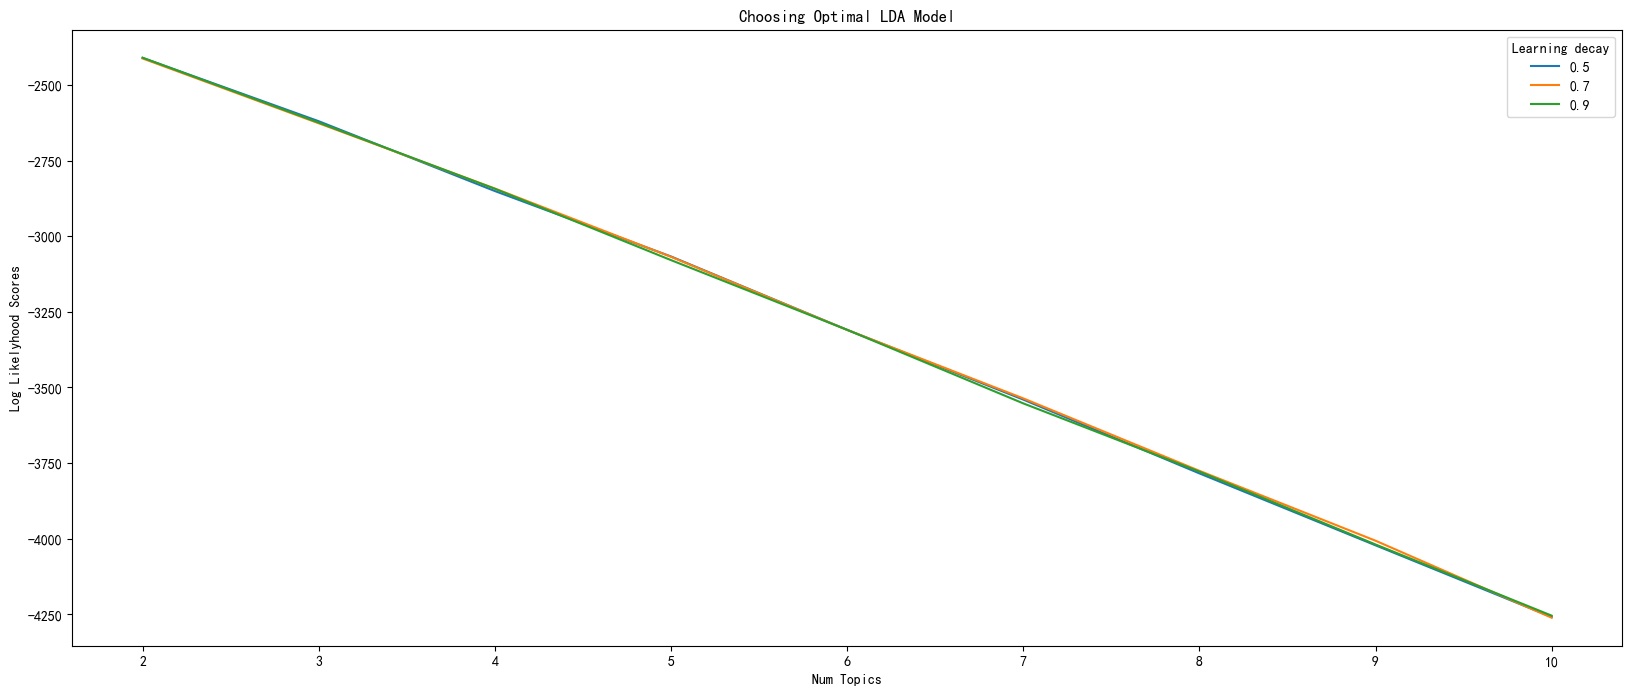

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
import joblib

model = joblib.load('lda_search1.pkl')
# Get Log Likelyhoods from Grid Search Output
n_topics=[2,3,4,5,6,7,8,9,10]
log_likelyhoods_5 = model.cv_results_['mean_test_score'][model.cv_results_['param_learning_decay']==0.5]
log_likelyhoods_7 = model.cv_results_['mean_test_score'][model.cv_results_['param_learning_decay']==0.7]
log_likelyhoods_9 = model.cv_results_['mean_test_score'][model.cv_results_['param_learning_decay']==0.9]

# Show graph
plt.figure(figsize=(20,8))
plt.plot(n_topics,log_likelyhoods_5,label='0.5')
plt.plot(n_topics,log_likelyhoods_7,label='0.7')
plt.plot(n_topics,log_likelyhoods_9,label='0.9')
plt.title('Choosing Optimal LDA Model')
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title= 'Learning decay', loc='best')
plt.show()

In [133]:
# 初始化TfidfVectorizer对象，用于后续文本数据的向量化处理
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(df['reviews_cut'])
n_topics = 2
learning_decay = 0.9
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_decay=learning_decay, random_state=1234567)
docres = lda_model.fit_transform(dtm)

# 获取主题-词项权重矩阵
components = lda_model.components_

# 获取词汇表，这是与LDA模型训练时使用的词汇表
feature_names = vectorizer.get_feature_names_out()

# 初始化一个字典来保存每个主题的关键词
topic_keywords = {}

# 遍历每个主题
for topic_idx, topic in enumerate(components):
    sorted_weights = sorted(enumerate(topic), key=lambda x: x[1], reverse=True)
    top_features_idx = [index for index, weight in sorted_weights[:10]]
    top_features = [feature_names[idx] for idx in top_features_idx]
    topic_keywords[f"Topic {topic_idx}"] = top_features

# 打印每个主题的关键词
for topic, keywords in topic_keywords.items():
    print(f"{topic} keywords: {keywords}")

Topic 0 keywords: ['女性', '作者', '故事', '本书', '生活', '喜欢', '小说', '历史', '社会', '世界']
Topic 1 keywords: ['北岛', '书店', '今敏', '克拉拉', '漫画', '老板', '日记', '推理', '中亚', '上校']


In [135]:
## docres
######将topic转为変量
for i in range(1,n_topics+1):
    top_i=[]
    for index, row in df.iterrows():
        top_i.append(docres[index].tolist()[i-1])
    df['topic{i}'.format(i=i)]=top_i
df

Unnamed: 0                                        reviews_cut    topic1  \
0            0  五年 前 早 傲慢无礼 冷酷 没良心 生活 无关 大学 里 金智英 短暂 母亲 拥有 人生 ...  0.970576   
1            1  急 吐 槽 译名 忍不住 想替 译者 编辑 高亮 这句 话 〃 ▽ 〃 鸟 飞往 山 Fle...  0.972859   
2            2  读完 更爱书 听说 教授 办公室 书 泪流满面 自觉 这辈子 读 完 书 喜欢 书 真的 好...  0.952096   
3            3  天天 喜欢 躺 懒 头 倾向 时间 流逝 更慢 地方 XD \n 故事 事物 混合 留下 痕...  0.967812   
4            4    敏 好久不见 搞 未麻 部屋 挺 忙 好想哭 精彩 故事 淡淡的 铅笔 稿 想念 心绪 ...  0.951992   
5            5  哎呀呀 让给 上海 译文 做一套 定价 六百 精装 \n 披 一千零一夜 外衣 奥德修 斯 ...  0.972489   
6            6  五月天 新书 \n 絮叨 磨叽 文字 贯彻始终 能量 密度 极低 上校 内心 秘密 信 读 ...  0.962180   
7            7  内地 小说 写作者 周围环境 家长里短 社会 新闻 局限 中 解放出来 想象力 大胆 一点 ...  0.976107   
8            8  总 每篇 做梦 最终 思想 力 说话 修辞 迷幻 术 只能 吸引 五分 读者 文学 止 语言...  0.976518   
9            9  工人阶级 出身 知识分子 逃离 逃离 一种 暴力 家乡 三十年 父亲 死 契机 经由 痛苦 ...  0.974307   
10          10  舞 \n 看着 妻子 瘦弱 身材 性感 屁股 滑稽地 摇摆 固执 汗水 变得 斑驳 脸 心中...  0.967996   
11          11  年少 读书 求知 往事 陈嘉映 作品 里 描述 喜欢 读 一股 精气神 锐利 骄傲 足以 化...  0.971614   
12          12  读 一本 喜欢 非 虚构 写作 失落 卫星 停不下来 喜欢 读 之外 远远 文化 自我 母语...  0.963553   
13          13  凯雷特 绝佳 阅读 场景 浴室 泡澡 泡 透 泡到 舒展 松弛 收获 一个个 戳破 肥皂泡 ...  0.968887   
14          14  四十年 本书 好多 地方 想要 摘抄 好多 地方 哑然失笑 重读 好多遍 一本 灯下 故人 ...  0.975277   
15          15                翻译 常规 平淡 故事 易懂 文学 美感 示弱 遐想 空间 太过...  0.969117   
16          16  译者 译 后记 观点 克拉拉 第二次 太阳 祈祷 乔西 神迹 般 痊愈 后续 故事 假 克拉...  0.953547   
17          17  教会 徒弟 害死 师傅 哈哈哈 哈哈哈 哈哈哈 \n 一本 神作 终于 引进 激动 哭泣 \...  0.962188   
18          18  站 前人 探索 肩膀 从零开始 这本 小书 做 弥合 女性主义 话语 传承 断裂 整天 网友...  0.966737   
19          19  偏浅 说 入门 普及读物 不赢 太高 遗憾 兰 老师 传达 乐观 心态 读者 理解 中国 经...  0.972106   
20          20  逃避 痛苦 至少 找 聊聊 聊聊 真实 聊聊 看似 无解 困局 直面 痛苦 发现 困境 出路...  0.970254   
21          21  总 哲学家 一群 吃饱 撑 没事干 瞎琢磨 \n \n 本书 深深地 这群 没事干 创造 社...  0.973474   
22          22  这部 故事 串起 作品 既有 小说 文学 张力 阐明 美国 社会现状 来龙去脉 可谓 精彩 ...  0.969538   
23          23  有人 说余华 不写 都市 说 中国 作家 城镇化 环境 与时俱进 拜托 余华写 写 不出 个...  0.970154   
24          24  词句 雕琢 做作 故事 故事 说好 皱眉 一篇 打动 文字 背后 透出 作者 心胸 之窄 实...  0.973145   
25          25  牛 逼 哄哄 去年 心中 毫无疑问 NO.1 作品 2019 年 流过 眼泪 燃起 愤怒 5...  0.968826   
26          26  别倒 垃圾 理解 为啥 东西 国内 卖点 中国 走 日 韩 走 路 迎合 男女 对立 想法 ...  0.967033   
27          27  见到 现象 现象 未必 真相 思考 越 越会 智慧 本质 事物 比例 公正 判断 \n \n...  0.969482   
28          28  清水 洁真 担得 孤 勇者 称号 以一己 之力 揭示 系统 黑幕 无奈 始终 伴随 极致 依...  0.963310   
29          29  说实话 失望 技巧 太 感情 太 少 空描 一个个 命题 故事 打动 人心 灵气 前作 相比...  0.969285   
30          30  完 终于 明白 采访 时 杨本芬 奶奶 女儿 说 结婚 婚姻 中 收获 痛苦 伤害 冷漠 远...  0.967925   
31          31  讽刺 坐在 餐厅 里 冻得 发抖 读 看不见 女性 意识 餐厅 空调 温度 男性 设置 加 ...  0.962677   
32          32  XXX 老熟 兄弟 \n 诗歌 喜欢 北岛 散文 文笔 羡慕 北岛 朋友圈 一众 诗歌 界 ...  0.951280   
33          33  年 读 女性主义 著作 女同胞 缺乏 理论知识 支持 自我意识 觉醒 男 读读 书 发现自己...  0.961491   
34          34  好奇 历史 边缘 人物 故事会 呈现 \n 地方 繁琐 \n 相比 微观 史 像是 聚焦 于...  0.962544   
35          35  口碑 高 读 炫技 多于 实质 说 刻薄 科学 段子 大串烧 之外 概括 本书 感觉 预设 ...  0.972508   
36          36  作者 最牛 逼 地方 工作 压榨 挤压 时间 时 仍能 内心 敏感 写下 坦诚 真实 文字 ...  0.974432   
37          37  女版 活着 活着 里 偶发事件 亲人 发烧 失聪 献血 至死 杜撰 无数 概率 事件 男人 ...  0.971651   
38          38  100 年前 大部分 国人 吃饱 穿 暖 活下去 课题 环境 里 大城市 帮佣 劳动力 一个...  0.972314   
39          39  房思琪 悲剧 拥有 类似 情节 先 利用自身 权力 经验 施以 巧言令色 令其 孤独 青春期...  0.973744   
40          40  界 想到 两个 字 日本 西化 属地 感 想到 年龄 好奇 思考 反对 包括 推翻 文中 那...  0.965072   
41          41  认同 值得 力荐 理解 上野 学术 理想 作品 优点 缺点 分析 解释 功力 极好 深刻 晦...  0.958618   
42          42  仅凭 女性 劳动力 报酬 化 一个点 本书 值得 五星 周遭 父母 丈夫 子女 辛苦 操劳 ...  0.962292   
43          43  才华 做 阻挠 迸发 灵感 单从 诗 写 小说 太 遗憾 家里人 支持 文学创作 老婆 说 ...  0.971933   
44          44  适读 性 友好 本书 对谈 出发点 落脚点 明白 戴 锦华 一篇 很难 想象 长 难句 口述...  0.969043   
45          45  初读 新鲜 越 后边 越 描写 崩坏 心理 诗意 抽象 感同身受 \n 国家 消失 一门 语...  0.970290   

      topic2  
0   0.029424  
1   0.027141  
2   0.047904  
3   0.032188  
4   0.048008  
5   0.027511  
6   0.037820  
7   0.023893  
8   0.023482  
9   0.025693  
10  0.032004  
11  0.028386  
12  0.036447  
13  0.031113  
14  0.024723  
15  0.030883  
16  0.046453  
17  0.037812  
18  0

从上述结果可以看出，所有46本书籍都可划分到主题1，即 ['女性', '作者', '故事', '本书', '生活', '喜欢', '小说', '历史', '社会', '世界']